<a href="https://colab.research.google.com/github/Aye-Nyein-Thaw/TensorFlow-Beginner/blob/main/coding-exercise/week%205/part2/2_Tensorflow_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf



## Retrieve images for testing

In [ ]:
!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

## ImageNet labels

In [ ]:
!wget -O labels.txt --quiet https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

# read the categories text file
with open('labels.txt', 'r') as txt_file:
    categories = txt_file.read().splitlines()
    
# number of labels
num_class = len(categories)
print(num_class)

1001


## Google's Mobilenet v1 model

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import Sequential

module_url = 'https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4'

model = Sequential([
    hub.KerasLayer(module_url)
])

model.build( input_shape = [None, 160, 160, 3])

In [ ]:
# Import and preprocess 3 sample ImageNet images
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

lemon_img = load_img("lemon.jpg", target_size=(160, 160))
viaduct_img = load_img("viaduct.jpg", target_size=(160, 160))
water_tower_img = load_img("water_tower.jpg", target_size=(160, 160))

# convert image to array
img_arr = img_to_array(water_tower_img)

# normalize
img_arr = img_arr / 255.0

# expand_dimensions
img_arr = img_arr[np.newaxis, ...]

# predict
predictions = model.predict(img_arr)

# get top 5 positions
k = 5
sort = np.argsort(-predictions[0])
top_k = sort[:k]

# display top 5
for i in top_k:
    print('{} = {}'.format(categories[i], predictions[0][i]))

solar dish = 9.203848838806152
water tower = 9.039416313171387
aircraft carrier = 8.5388765335083
jigsaw puzzle = 8.328409194946289
oxygen mask = 8.18191146850586


## Function to display top 5 predictions

In [ ]:
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

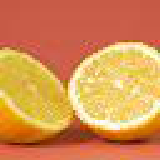

,prediction
1,shower cap
2,tray
3,candle
4,brassiere
5,African chameleon


In [ ]:
# top 5 predictions for lemon image
display(lemon_img)
get_top_5_predictions(lemon_img)

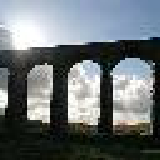

,prediction
1,viaduct
2,pier
3,dam
4,prison
5,solar dish


In [ ]:
# top 5 predictions for viaduct image
display(viaduct_img)
get_top_5_predictions(viaduct_img)

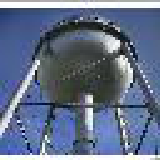

,prediction
1,solar dish
2,water tower
3,aircraft carrier
4,jigsaw puzzle
5,oxygen mask


In [ ]:
# top 5 predictions for water tower image
display(water_tower_img)
get_top_5_predictions(water_tower_img)

## Let's test with our own image

Egyptian cat  = 14.9964285
tabby  = 13.430709
tiger cat  = 13.354225
plastic bag  = 13.264215
Persian cat  = 10.937148


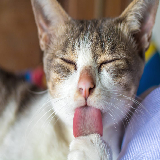

In [ ]:
# load your own image

filepath = # your code here
my_image = load_img(filepath, target_size=(160, 160))
img_arr = img_to_array(my_image)

# normalize
img_arr = img_arr / 255.0

# expand_dimensions
img_arr = img_arr[np.newaxis, ...]

# predict
predictions = model.predict(img_arr)

# get top 5 positions
k = 5
sort = np.argsort(-predictions[0])
top_k = sort[:k]

# display top 5
for i in top_k:
    print(categories[i],' =' ,predictions[0][i])

display(my_image)

## Another way to load hub module

In [ ]:
# load module
module = hub.load(module_url)

# predict
predictions = module(img_arr)[0]

# top 5 predictions
top_k_pred_values, top_k_indices = tf.math.top_k(predictions, k=5)
top_k_pred_values = top_k_pred_values.numpy()
top_k_indices = top_k_indices.numpy()

# Display top 5 predictions

for probability, index in zip(top_k_pred_values, top_k_indices):
    print( categories[index], probability)